In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import json
df = pd.read_csv('global_results.csv')
print(df.to_string(index=False))

          timestamp                                           model_name                                                                                                                               parameters  train_max_acc  train_round  train_loss  val_max_acc  val_round  val_loss  test_max_acc  test_round  test_loss
2025-08-05 04:45:13                                                  fed         {"lr": 0.01, "weight_decay": 0.0001, "batch_size": 128, "K": 100, "C": 0.1, "J": 4, "ROUNDS": 4, "GAMMA": 0.15, "momentum": 0.9}         0.0176            4      4.5900       0.0204          4    4.5891        0.0189           3     4.5964
2025-08-05 04:48:47                                       fed_gamma_0.23         {"lr": 0.01, "weight_decay": 0.0001, "batch_size": 128, "K": 100, "C": 0.1, "J": 4, "ROUNDS": 2, "GAMMA": 0.23, "momentum": 0.9}         0.0168            2      4.6024       0.0174          2    4.6031        0.0169           2     4.6024
2025-08-05 04:49:00                  

In [12]:
data = """timestamp,model_name,parameters,train_max_acc,train_round,train_loss,val_max_acc,val_round,val_loss,test_max_acc,test_round,test_loss
2025-08-08 19:16:20,hetetogeneous_shard_iid_J_4_LR_0.01,"{""lr"": 0.01, ""weight_decay"": 0.0001, ""batch_size"": 128, ""K"": 100, ""C"": 0.1, ""J"": 4, ""ROUNDS"": 2000, ""GAMMA"": ""uniform"", ""momentum"": 0.9}",0.8723,1995,0.4008,0.4374,1961,4.0792,0.4539,1878,4.1963
2025-08-08 22:36:49,hetetogeneous_shard_non_iid_1_J_4_LR_0.01,"{""lr"": 0.01, ""weight_decay"": 0.0001, ""batch_size"": 128, ""K"": 100, ""C"": 0.1, ""J"": 4, ""ROUNDS"": 2000, ""GAMMA"": ""uniform"", ""momentum"": 0.9}",0.2034,1993,3.1512,0.1926,1951,3.3638,0.2134,1993,3.1206
... (rest of your data) ...
"""

# Read CSV


# Extract J value from model_name
""" pattern = r'shard_(.+?)_J_(\d+)_'
df = df[df['model_name'].str.contains(pattern, regex=True)].copy()

# Extract dataset_type and J safely
df['dataset_type'] = df['model_name'].apply(lambda x: re.search(pattern, x).group(1))
df['J'] = df['model_name'].apply(lambda x: int(re.search(pattern, x).group(2)))

# Plot
plt.figure(figsize=(10, 6))
for dtype, group in df.groupby('dataset_type'):
    plt.scatter(group['J'], group['test_max_acc'], label=dtype, s=80)

plt.xlabel('J value')
plt.ylabel('Test Max Accuracy')
plt.title('Test Accuracy by J value and Dataset Type')
plt.legend(title="Dataset Type")
plt.grid(True)
plt.show() """

<>:11: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_11733/317695064.py:11: SyntaxWarning: invalid escape sequence '\d'
  """ pattern = r'shard_(.+?)_J_(\d+)_'


' pattern = r\'shard_(.+?)_J_(\\d+)_\'\ndf = df[df[\'model_name\'].str.contains(pattern, regex=True)].copy()\n\n# Extract dataset_type and J safely\ndf[\'dataset_type\'] = df[\'model_name\'].apply(lambda x: re.search(pattern, x).group(1))\ndf[\'J\'] = df[\'model_name\'].apply(lambda x: int(re.search(pattern, x).group(2)))\n\n# Plot\nplt.figure(figsize=(10, 6))\nfor dtype, group in df.groupby(\'dataset_type\'):\n    plt.scatter(group[\'J\'], group[\'test_max_acc\'], label=dtype, s=80)\n\nplt.xlabel(\'J value\')\nplt.ylabel(\'Test Max Accuracy\')\nplt.title(\'Test Accuracy by J value and Dataset Type\')\nplt.legend(title="Dataset Type")\nplt.grid(True)\nplt.show() '

In [17]:
import pandas as pd

# Read the CSV file
df = pd.read_csv("res_heterogenous.csv")

# Remove duplicates ignoring the timestamp column
df_unique = df.drop_duplicates(subset=df.columns.difference(['timestamp']))

# Save the cleaned CSV
df_unique.to_csv("no_duplicate_res_heterogenous.csv", index=False)

print(f"Original rows: {len(df)}, Unique rows: {len(df_unique)}")


Original rows: 22, Unique rows: 15


In [20]:
pattern = r'shard_(.+?)_J_(\d+)_'

df = df_unique[df_unique['model_name'].str.contains(pattern, regex=True)].copy()
df['dataset_type'] = df['model_name'].apply(lambda x: re.search(pattern, x).group(1))
df['J'] = df['parameters'].apply(lambda x: json.loads(x.replace('""', '"'))['J'])
df_sorted = df.sort_values(by='J')
print(df_sorted[['dataset_type', 'J']])

   dataset_type   J
0           iid   4
1     non_iid_1   4
6     non_iid_5   4
11   non_iid_10   4
20   non_iid_50   4
4     non_iid_1   8
7     non_iid_5   8
2           iid   8
15   non_iid_10   8
21   non_iid_50   8
5     non_iid_1  16
3           iid  16
14   non_iid_50  16
13   non_iid_10  16
12    non_iid_5  16


/tmp/ipykernel_11733/2336250741.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df = df_unique[df_unique['model_name'].str.contains(pattern, regex=True)].copy()


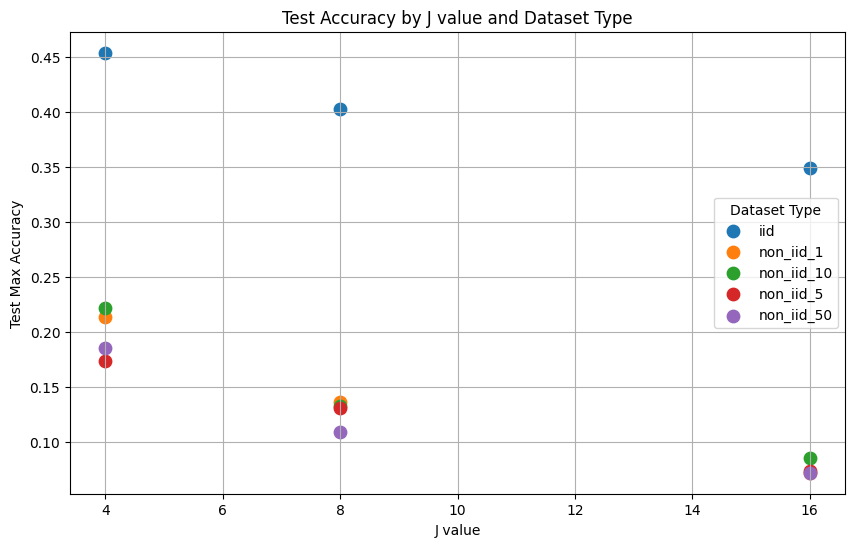

In [22]:
plt.figure(figsize=(10, 6))
for dtype, group in df.groupby('dataset_type'):
    plt.scatter(group['J'], group['test_max_acc'], label=dtype, s=80)

plt.xlabel('J value')
plt.ylabel('Test Max Accuracy')
plt.title('Test Accuracy by J value and Dataset Type')
plt.legend(title="Dataset Type")
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
for dtype, group in df.groupby('J'):
    plt.scatter(group['dataset_type'], group['test_max_acc'], label=dtype, s=80)

plt.xlabel('Dataset Type')
plt.ylabel('Test Max Accuracy')
plt.title('Test Accuracy by J value and Dataset Type')
plt.legend(title="J")
plt.grid(True)
plt.show()

/tmp/ipykernel_11733/58156431.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df = df[df['model_name'].str.contains(pattern, regex=True)].copy()


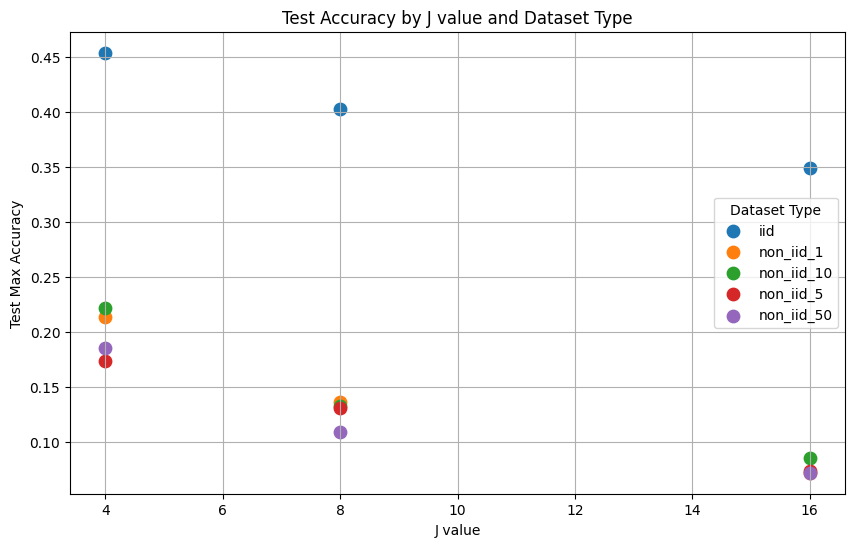

In [21]:
pattern = r'shard_(.+?)_J_(\d+)_'
df = df[df['model_name'].str.contains(pattern, regex=True)].copy()

# Extract dataset_type and J safely
df['dataset_type'] = df['model_name'].apply(lambda x: re.search(pattern, x).group(1))
df['J'] = df['model_name'].apply(lambda x: int(re.search(pattern, x).group(2)))

# Plot
plt.figure(figsize=(10, 6))
for dtype, group in df.groupby('dataset_type'):
    plt.scatter(group['J'], group['test_max_acc'], label=dtype, s=80)

plt.xlabel('J value')
plt.ylabel('Test Max Accuracy')
plt.title('Test Accuracy by J value and Dataset Type')
plt.legend(title="Dataset Type")
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# List of gamma values and corresponding file names
gammas = [0.01,0.1, 0.5, 1, 10]
base_path = './fedavg_results_gamma_{}.csv'

# Set up the plot
plt.figure(figsize=(12, 6))

# Load and plot each CSV
for gamma in gammas:
    file_path = base_path.format(gamma)
    df = pd.read_csv(file_path)

    plt.plot(df['round'], df['test_acc'], label=f'γ = {gamma}')
    print(f"Gamma {gamma}: Max Test Acc = {df['test_acc'].max():.4f}")


# Configure plot
plt.xlabel('Federated Round')
plt.ylabel('Global Test Accuracy')
plt.title('FedAvg CIFAR-100: Test Accuracy vs Rounds for Different γ')
plt.grid(True)
plt.legend(title="Gamma")
plt.tight_layout()
plt.show()
